In [ ]:
# SVM Regression -> Done, LDA/QDA/ANN?/Naiive Bayes, use cross-validation!, PCA??? -> no high dimensionality
# https://github.com/sametgirgin/Machine-Learning-Regression-Models/blob/master/Decision_Tree_Regression.py -> Done
# Lab4 ML (Bayes Ridge Regression + Models) -> Done

## Load data & Remove Outlier/Noisy data samples

In [73]:
import pandas as pd

stanovi_data = pd.read_csv(r'C:\Users\User\Desktop\faks\VI semestar\PR\final_sk_stanovi.csv')
stanovi_data

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5.0,35.0,2.0,3.0,-1.0,-1.0,-1.0,30000.0
1,8.0,60.0,2.0,4.0,-1.0,-1.0,-1.0,47000.0
2,26.0,67.0,3.0,1.0,-1.0,1.0,1.0,47000.0
3,8.0,93.0,3.0,7.0,1.0,1.0,1.0,102000.0
4,4.0,136.0,4.0,1.0,-1.0,1.0,1.0,130000.0
...,...,...,...,...,...,...,...,...
3007,8.0,57.0,3.0,3.0,1.0,1.0,1.0,51300.0
3008,8.0,40.0,2.0,0.0,0.0,1.0,1.0,25000.0
3009,2.0,73.0,2.0,2.0,1.0,1.0,0.0,65000.0
3010,5.0,49.0,1.0,3.0,0.0,1.0,0.0,43000.0


This method works differently. It explicitly isolates anomalies instead of profiling and constructing normal points and regions by assigning a score to each data point. It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies. 

The next code is used for transforming the price per appartment to price per m^2.

In [2]:
df2_ceni = stanovi_data
for index, row in df2_ceni.iterrows():
    #print(row[1])
    v = row[7] / row[1]
    row[7] = v        
    df2_ceni.loc[index] = row
    #print(df2_ceni.loc[index,])
df2_ceni


,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
0,5.0,35.0,2.0,3.0,-1.0,-1.0,-1.0,857.142857
1,8.0,60.0,2.0,4.0,-1.0,-1.0,-1.0,783.333333
2,26.0,67.0,3.0,1.0,-1.0,1.0,1.0,701.492537
3,8.0,93.0,3.0,7.0,1.0,1.0,1.0,1096.774194
4,4.0,136.0,4.0,1.0,-1.0,1.0,1.0,955.882353
...,...,...,...,...,...,...,...,...
3007,8.0,57.0,3.0,3.0,1.0,1.0,1.0,900.000000
3008,8.0,40.0,2.0,0.0,0.0,1.0,1.0,625.000000
3009,2.0,73.0,2.0,2.0,1.0,1.0,0.0,890.410959
3010,5.0,49.0,1.0,3.0,0.0,1.0,0.0,877.551020


In [3]:
stanovi_data = df2_ceni

In [74]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(stanovi_data)

cnt = 0
i = 0
outliers_idx = []
for a in preds:
    if a == -1:
        cnt += 1
        outliers_idx.append(i)
    i += 1
    
print(cnt)
print(max(outliers_idx))

865
3010


In [75]:
stanovi_data = stanovi_data.drop(outliers_idx, axis=0)
stanovi_data

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг,Цена (EUR)
3,8.0,93.0,3.0,7.0,1.0,1.0,1.0,102000.0
6,10.0,60.0,3.0,0.0,-1.0,1.0,1.0,54000.0
8,2.0,94.0,3.0,3.0,1.0,1.0,1.0,86000.0
11,8.0,74.0,3.0,6.0,1.0,1.0,-1.0,86800.0
22,5.0,76.0,3.0,5.0,1.0,1.0,1.0,69000.0
...,...,...,...,...,...,...,...,...
3006,8.0,89.0,3.0,6.0,1.0,1.0,0.0,89000.0
3007,8.0,57.0,3.0,3.0,1.0,1.0,1.0,51300.0
3008,8.0,40.0,2.0,0.0,0.0,1.0,1.0,25000.0
3009,2.0,73.0,2.0,2.0,1.0,1.0,0.0,65000.0


In [27]:
from pandas_profiling import ProfileReport
prof = ProfileReport(stanovi_data)
prof.to_file('profiling_noOutliers.html')

This code will output the predictions for each data point in an array. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier. In our case according to this algorithm, we have 865 outlier data points.

In [ ]:
df = stanovi_data
df['Соби'] = df['Соби'].str.replace(',','.').astype(np.float64)

In [6]:
stanovi_data['Соби'].values.dtype

dtype('float64')

In [76]:
X = stanovi_data.iloc[:,0:7]
X

,Населба,Квадратура,Соби,Спрат,Лифт,Греење,Паркинг
3,8.0,93.0,3.0,7.0,1.0,1.0,1.0
6,10.0,60.0,3.0,0.0,-1.0,1.0,1.0
8,2.0,94.0,3.0,3.0,1.0,1.0,1.0
11,8.0,74.0,3.0,6.0,1.0,1.0,-1.0
22,5.0,76.0,3.0,5.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
3006,8.0,89.0,3.0,6.0,1.0,1.0,0.0
3007,8.0,57.0,3.0,3.0,1.0,1.0,1.0
3008,8.0,40.0,2.0,0.0,0.0,1.0,1.0
3009,2.0,73.0,2.0,2.0,1.0,1.0,0.0


In [77]:
y = stanovi_data.iloc[:,7:8]

In [19]:
z = y/521000.0 #scaled y in range (0,1)

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [166]:
X_names = X_train.columns.tolist()
X_names

['Населба', 'Квадратура', 'Соби', 'Спрат', 'Лифт', 'Греење', 'Паркинг']

In [202]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
afp = np.append(X_train.values, X_test.values)
#std.fit(afp.reshape((-1,1)))

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [203]:
X_train

array([[ 0.00594811, -0.50853153, -1.04683869, ..., -1.26062943,
         0.10937736,  0.53018133],
       [-0.87132196, -1.38810587, -1.04683869, ...,  0.64155853,
         0.10937736, -1.40484595],
       [-0.43268692, -0.06874436,  0.28710374, ...,  0.64155853,
         0.10937736, -3.33987323],
       ...,
       [-0.87132196,  0.81082999,  1.62104618, ...,  0.64155853,
         0.10937736,  0.53018133],
       [-0.87132196,  0.17558185,  0.28710374, ..., -1.26062943,
         0.10937736,  0.53018133],
       [ 0.00594811,  1.64153909,  1.62104618, ...,  0.64155853,
         0.10937736, -1.40484595]])

The RMSE is the square root of the variance of the residuals. ... Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

RMSE close to zero and R-Square approaching 1 are indicative of high accuracy between observed and predicted values

## XGBoost

XGBoost is an ensemble learning method.XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. The beauty of this powerful algorithm lies in its scalability, which drives fast learning through parallel and distributed computing and offers efficient memory usage.

In [175]:
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error

model=xgb.XGBRegressor(random_state=1, n_estimators=5000, learning_rate=0.01)
model.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))


11519.748657229691
Training set score: 0.96
Test set score: 0.77


In [12]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, model.predict(X_test))
coefficient_of_dermination

0.7656720004346007

## Data Normalization + XGBoost

In [180]:
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error

model=xgb.XGBRegressor(random_state=1, n_estimators=5000, learning_rate=0.01)
model.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))


12125.827120779433
Training set score: 0.96
Test set score: 0.74


In [21]:
model=xgb.XGBRegressor(random_state=1, n_estimators=5000, learning_rate=0.01)
model.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

0.021567285191968436
Training set score: 0.95
Test set score: 0.78


In [181]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, model.predict(X_test))
coefficient_of_dermination

0.7403663838492407

In [504]:
predicted = model.predict(X_test)

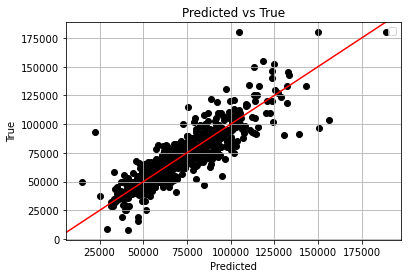

In [505]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=1)
from statsmodels.graphics.api import abline_plot
ax.scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
#ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend(labels="")

We analyzed and understood the data, we trained a model and tested it, we’re even satisfied with the performance. We can go the extra mile and show that our machine learning model is not a black box.
The Lime package can help us to build an explainer. To give an illustration we will take a random observation from the test set and see what the model predicts:

In [511]:
#print(y_test[90])
#print(predicted[90])
# print("True:" + str(y_test.values[1][0]) + "--> Pred:" + str(predicted[1][0]))
print("True:", "{:,.0f}".format(y_test[90]), "--> Pred:", "{:,.0f}".format(predicted[90]))

diff = []
for i in range (0, y_test.shape[0]):
    diff.append(abs(y_test[i] - predicted[i]))

print("Maximum difference: " + str(max(diff)))

True: 42,000 --> Pred: 46,909
Maximum difference: 75394.46875


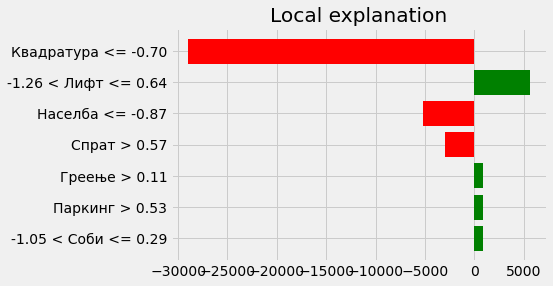

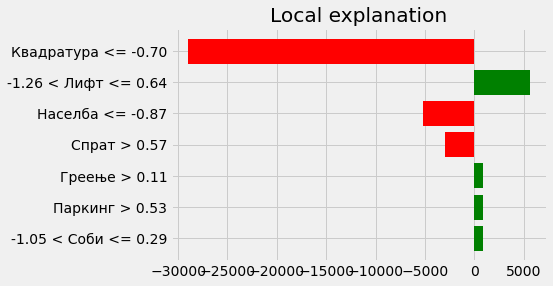

In [182]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names="Цена (EUR)", mode="regression")
explained = explainer.explain_instance(X_test[90], model.predict, num_features=10)
explained.as_pyplot_figure()

The main factor for this particular prediction was the apartment's m2 and the elevator.

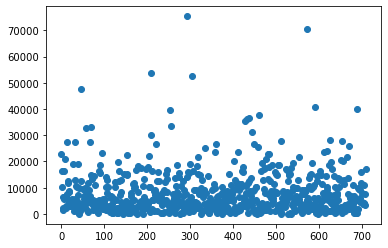

In [512]:
import matplotlib.pyplot
import pylab

lbl = []

for i in range (0, y_test.shape[0]):
    lbl.append(i)

matplotlib.pyplot.scatter(lbl,diff)

matplotlib.pyplot.show()

## K-Neighbors Regression (KNN Regression)

In [183]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, knn.predict(X_test))))
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

12460.613278168585
Training set score: 0.96
Test set score: 0.74


In [184]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, knn.predict(X_test))
coefficient_of_dermination

0.7258318426567524

## Linear Regression

In [478]:
import numpy as np
from sklearn.linear_model import LinearRegression
import math

model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_test, y_test)
rmse = math.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print('RMSE:', rmse)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))


RMSE: 12292.500732515677
coefficient of determination: 0.7331798256855029
intercept: [558.08320531]
slope: [[   31.81280837   897.05116698  1871.00613274  -853.56539306
   7332.96338745  3306.57552618 -4197.58175966]]
Training set score: 0.69
Test set score: 0.73


## Polynomial Regression => Best Model

Implementing polynomial regression with scikit-learn is very similar to linear regression. There is only one extra step: you need to transform the array of inputs to include non-linear terms such as 𝑥².

Now you have the input and output in a suitable format. Keep in mind that you need the input to be a two-dimensional array. That’s why .reshape() is used.

In [201]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a: Provide data
x = X_train
y = y_train
x, y = np.array(x), np.array(y)

xt = X_test
yt = y_test
xt, yt = np.array(xt), np.array(yt)

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
x_t = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_t, yt)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(yt, model.predict(x_t)))

print('RMSE:', rmse)
print('coefficient of determination:', r_sq)
print("Training set score: {:.2f}".format(model.score(x_, y)))
print("Test set score: {:.2f}".format(model.score(x_t, yt)))


RMSE: 11319.277471007194
coefficient of determination: 0.773756771366107
Training set score: 0.74
Test set score: 0.77


In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a: Provide data
x = X_train
y = y_train
x, y = np.array(x), np.array(y)

xt = X_test
yt = y_test
xt, yt = np.array(xt), np.array(yt)

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
x_t = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_t, yt)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(yt, model.predict(x_t)))

print('RMSE:', rmse)
print('coefficient of determination:', r_sq)
print("Training set score: {:.2f}".format(model.score(x_, y)))
print("Test set score: {:.2f}".format(model.score(x_t, yt)))


RMSE: 0.02172606040500432
coefficient of determination: 0.7737567713661048
Training set score: 0.74
Test set score: 0.77


The variance of the data could be explained even better if we enrich our dataset with more data, or if we remove the outliers that significantly stand out from the most common price values.

In [49]:
predicted = model.predict(x_t)

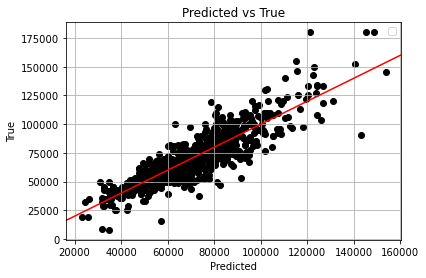

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=1)
from statsmodels.graphics.api import abline_plot
ax.scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
#ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend(labels="")
    


In [566]:
print(y_test.values[90][0])
print(predicted[90][0])
# print("True:" + str(y_test.values[1][0]) + "--> Pred:" + str(predicted[1][0]))
print("True:", "{:,.0f}".format(y_test.values[90][0]), "--> Pred:", "{:,.0f}".format(predicted[90][0]))

diff = []
for i in range (0, y_test.shape[0]):
    diff.append(abs(y_test.values[i][0]- predicted[i][0]))

print("Maximum difference: " + str(max(diff)))

42000.0
39977.37371826172
True: 42,000 --> Pred: 39,977
Maximum difference: 58749.591857910156


## Logistic Regression

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


r_sq = model.score(X_test, y_test)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

classification_report(y_test, predictions)

print('RMSE:', rmse)
print('coefficient of determination:', r_sq)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RMSE: 18195.902955791633
coefficient of determination: 0.028208744710860368


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVR - Support Vector Regression

In [237]:
from sklearn.svm import SVR
import math
from sklearn.metrics import mean_squared_error

# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='poly', degree=10, gamma='auto')
regressor.fit(X_train,y_train)
#5 Predicting a new result
#y_pred = regressor.predict(6.5)

# Step 4: Get results
r_sq = regressor.score(X_test, y_test)

# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))

print('RMSE:', rmse)
print('coefficient of determination:', r_sq)
print("Training set score: {:.2f}".format(regressor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regressor.score(X_test, y_test)))

RMSE: 20865.079891752037
coefficient of determination: 0.23126211987469014
Training set score: 0.26
Test set score: 0.23


## Експериментирање со атрибутите

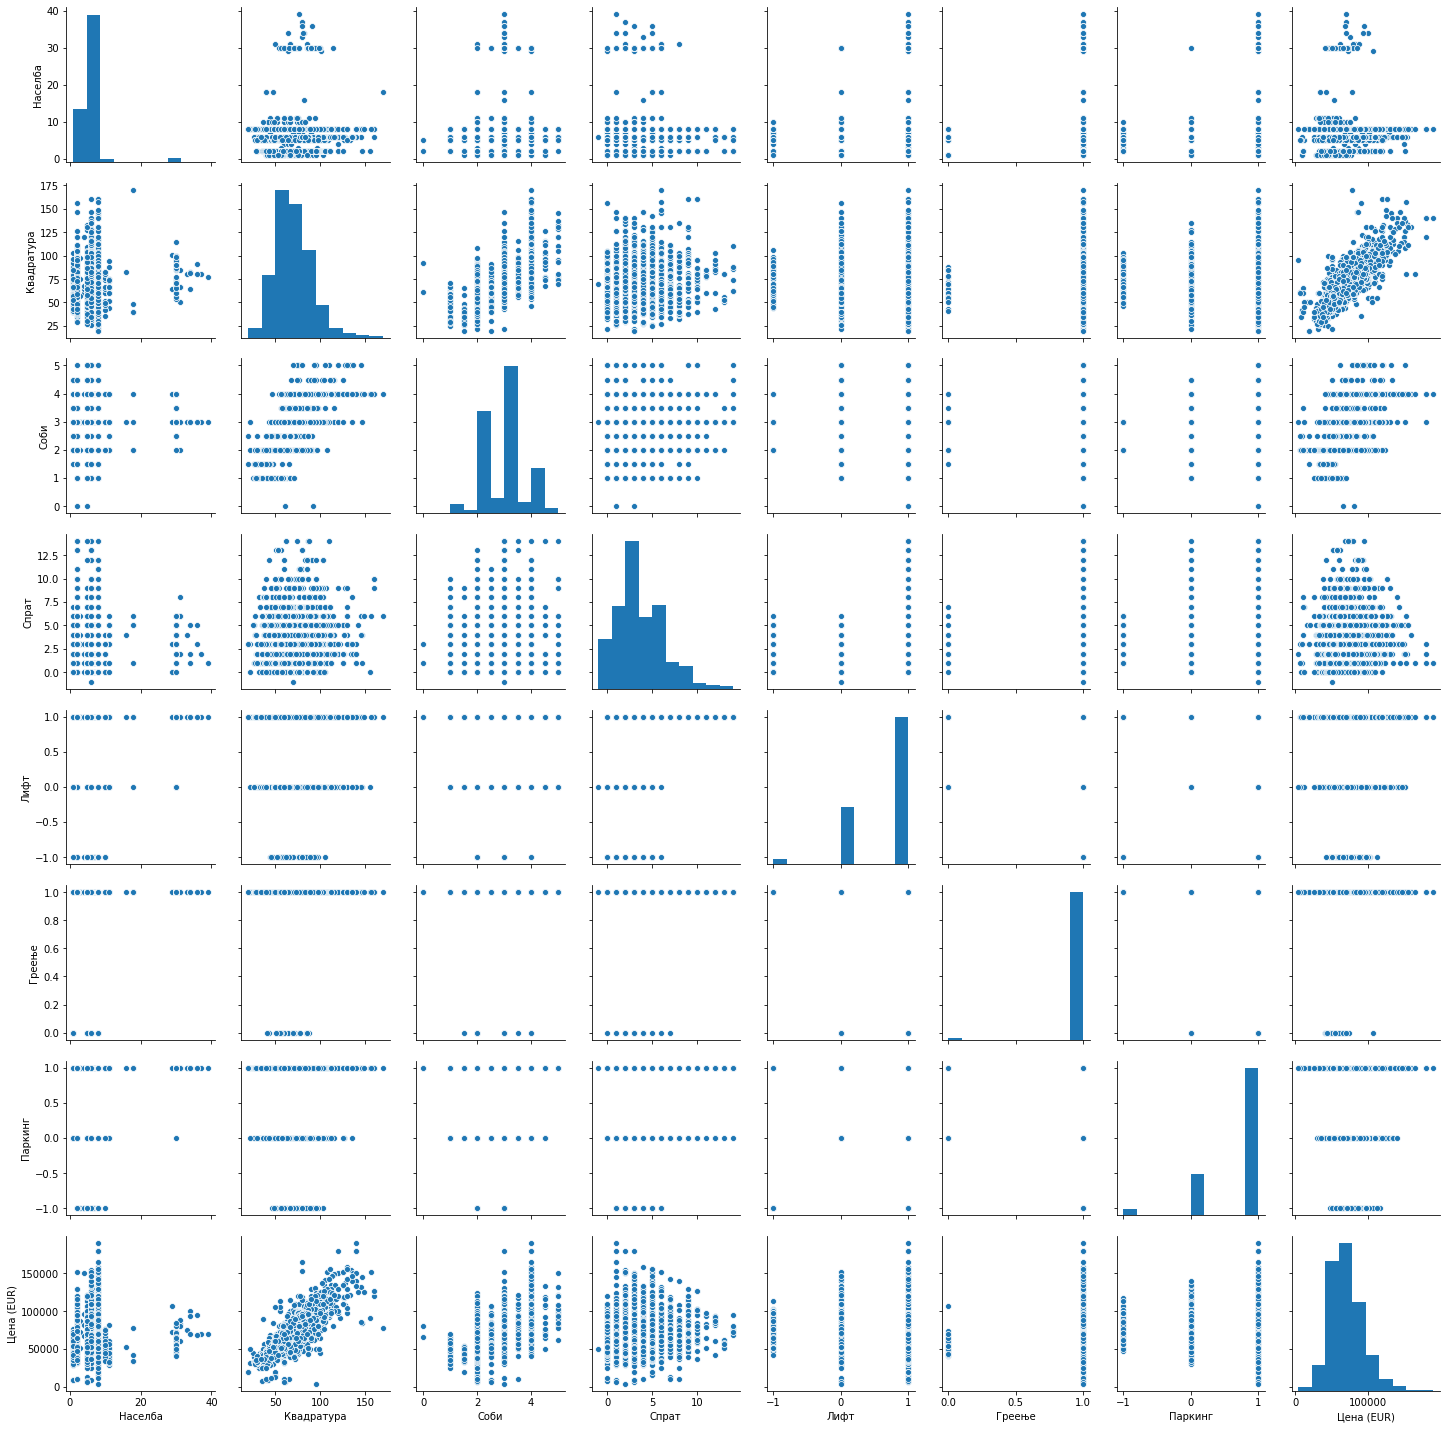

In [484]:
sns.pairplot(stanovi_data)

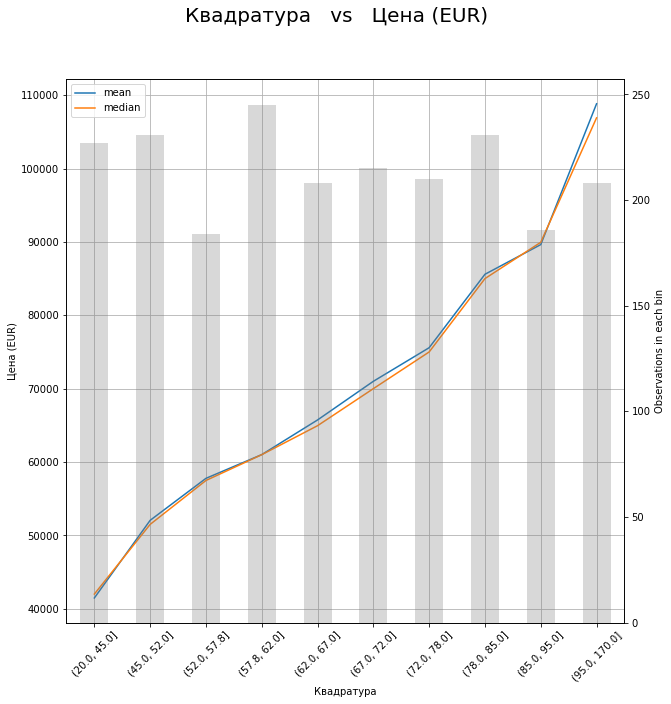

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


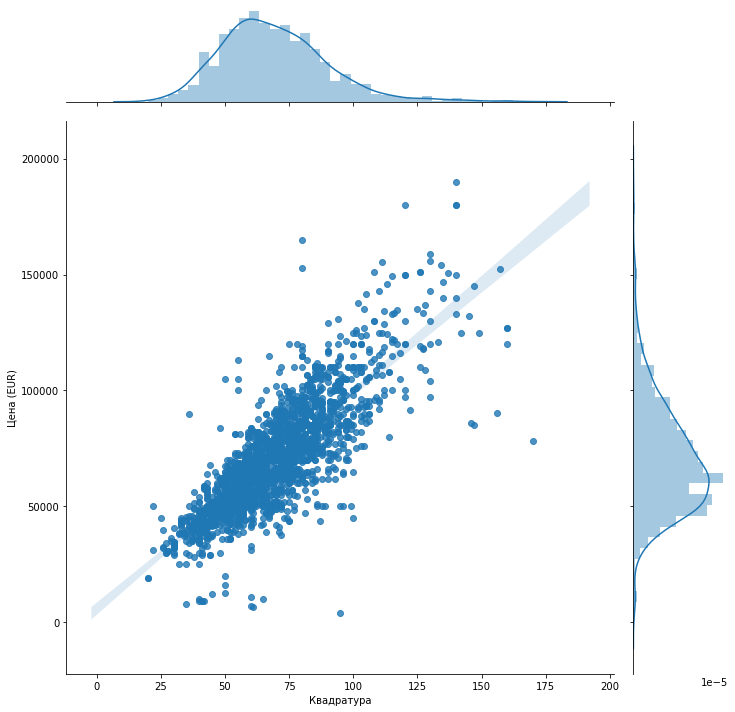

In [526]:
import matplotlib.pyplot as plt
import seaborn as sns

x, y = "Квадратура", "Цена (EUR)"
dtf = stanovi_data
### bin plot
dtf_noNan = dtf[dtf[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observations in each bin")
plt.show()
### scatter plot
figsize=(10,10)
sns.jointplot(x=x, y=y, data=dtf, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
plt.show()

 Цена (EUR) is predictive, there is a clear pattern: on average, the larger the apartments the higher the price, even though there are some outliers with an above-average size and a relatively low price.
 
Just like before, we can test the correlation between these 2 variables. Since they are both numerical, we can use the Pearson’s Correlation Coefficient: assuming that two variables are independent (null hypothesis), it tests whether two samples have a linear relationship. If the p-value is small enough (<0.05), the null hypothesis can be rejected and we can say that the two variables are probably dependent.

This kind of analysis should be carried on for each variable in the dataset to decide what should be kept as a potential feature and what can be dropped because not predictive.

In [486]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

attributes = ["Населба", "Квадратура", "Соби", "Спрат", "Лифт", "Греење", "Паркинг"]
dtf = stanovi_data

for a in attributes:
    x, y = a, "Цена (EUR)"

    dtf_noNan = dtf[dtf[x].notnull()]
    coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
    coeff, p = round(coeff, 3), round(p, 3)
    conclusion = "Significant" if p < 0.05 else "Non-Significant"
    print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+") for attribute: " + a)

Pearson Correlation: 0.088 Significant (p-value: 0.0) for attribute: Населба
Pearson Correlation: 0.817 Significant (p-value: 0.0) for attribute: Квадратура
Pearson Correlation: 0.595 Significant (p-value: 0.0) for attribute: Соби
Pearson Correlation: 0.038 Non-Significant (p-value: 0.078) for attribute: Спрат
Pearson Correlation: 0.135 Significant (p-value: 0.0) for attribute: Лифт
Pearson Correlation: 0.06 Significant (p-value: 0.006) for attribute: Греење
Pearson Correlation: -0.025 Non-Significant (p-value: 0.255) for attribute: Паркинг


"Населба", "Квадратура", "Соби", "Лифт" and "Греење" are examples of predictive features, therefore we can try keeping only them for modeling. This observation indicates that these 5 features have the greatest impact in the decision what would the final price for the appartment be.

Text(0.5, 1.0, 'pearson correlation')

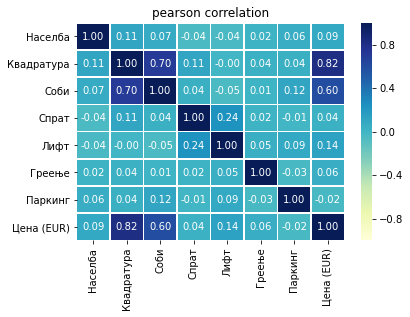

In [88]:
corr_matrix = stanovi_data.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

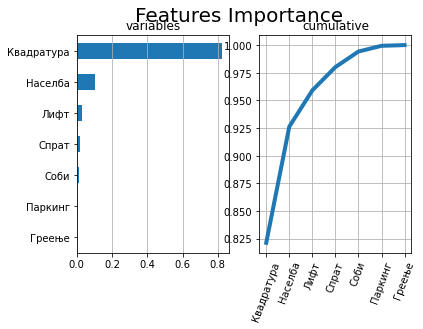

In [82]:
from sklearn import ensemble

dtf = stanovi_data
y_train1 = np.array(y_train).reshape((1438, ))
feature_names = X_train.columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X_train,y_train1)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [83]:
sk_stanovi1 = stanovi_data.drop("Паркинг", axis=1)
#sk_stanovi1 = sk_stanovi1.drop("Спрат", axis=1)


In [84]:
X1 = sk_stanovi1.iloc[:,0:6]
y1 = sk_stanovi1.iloc[:,6:7]
y1

,Цена (EUR)
3,102000.0
6,54000.0
8,86000.0
11,86800.0
22,69000.0
...,...
3006,89000.0
3007,51300.0
3008,25000.0
3009,65000.0


In [85]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [86]:
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error

model=xgb.XGBRegressor(random_state=1, n_estimators=5000, learning_rate=0.01)
model.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))


11652.326113438494
Training set score: 0.96
Test set score: 0.76


In [87]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, model.predict(X_test))
coefficient_of_dermination

0.7602473372155062

It is clear that most of the variance in the data is explained by five of all 7 attributes, but anyway excluding the remaining features yields worse model performance, so we will keep all attributes.

## Trying other regression models

Data normalization, regularization, and some alternative models included.

### RFRegressor 

In [52]:
from sklearn.linear_model import RidgeCV, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import sys

'''
std = StandardScaler()
afp = np.append(X_train.values, X_test.values)
std.fit(afp.reshape((-1,1)))

X_train = std.transform(X_train)
X_test = std.transform(X_test)

'''

lr = RandomForestRegressor(n_estimators=50)
#lr = RidgeCV(alphas=np.arange(70,100,0.1), fit_intercept=True)
lr.fit(X_train, y_train)
y_train = np.array(y_train).reshape((y_train.shape[0],))
y_test= np.array(y_test).reshape((y_test.shape[0],))

# Step 4: Get results
from sklearn.metrics import r2_score

predictions = lr.predict(X_test)
coefficient_of_dermination = r2_score(y_test, predictions)


# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)
print('coefficient of determination:', coefficient_of_dermination)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))



RMSE: 10887.834031587021
coefficient of determination: 0.7906749700334702
Training set score: 0.96
Test set score: 0.79


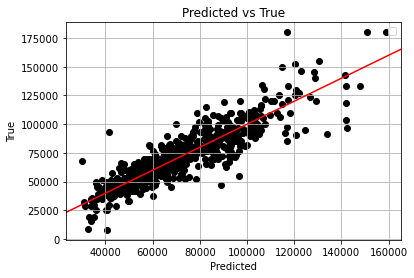

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=1)
from statsmodels.graphics.api import abline_plot
ax.scatter(predictions, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
#ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend(labels="")
    

In [47]:
#print(y_test[90])
#print(predicted[90])
# print("True:" + str(y_test.values[1][0]) + "--> Pred:" + str(predicted[1][0]))
print("True:", "{:,.0f}".format(y_test[90]), "--> Pred:", "{:,.0f}".format(predictions[90]))

diff = []
for i in range (0, y_test.shape[0]):
    diff.append(abs(y_test[i] - predictions[i]))

print("Maximum difference: " + str(max(diff)))

True: 42,000 --> Pred: 49,671
Maximum difference: 63040.119999999995


### Ridge/Lasso Regressor 

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import math

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

m = ridge_regressor.fit(X_train, y_train)

# Step 4: Get results
from sklearn.metrics import r2_score

predictions = m.predict(X_test)
coefficient_of_dermination = r2_score(y_test, predictions)


# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)
print('coefficient of determination:', coefficient_of_dermination)

print("Training set score: {:.2f}".format(m.score(X_train, y_train)))
print("Test set score: {:.2f}".format(m.score(X_test, y_test)))

RMSE: 12297.86546205908
coefficient of determination: 0.732946881965599
Training set score: -173089284.67
Test set score: -151237494.92


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
ridge_regressor.best_params_

{'alpha': 10}

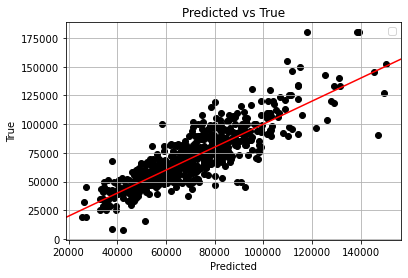

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=1)
from statsmodels.graphics.api import abline_plot
ax.scatter(predictions, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
#ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend(labels="")

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

m = lasso_regressor.fit(X_train, y_train)

# Step 4: Get results
from sklearn.metrics import r2_score

predictions = m.predict(X_test)
coefficient_of_dermination = r2_score(y_test, predictions)


# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)
print('coefficient of determination:',coefficient_of_dermination)

print("Training set score: {:.2f}".format(m.score(X_train, y_train)))
print("Test set score: {:.2f}".format(m.score(X_test, y_test)))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99564372202.09741, tolerance: 64521241.09688042
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100564408932.55637, tolerance: 62233083.87089121
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101630240236.73204, tolerance: 63800440.64514131
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94

RMSE: 12298.895253569583
coefficient of determination: 0.7329021554154629
Training set score: -173096262.40
Test set score: -151262824.46


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Coefficients W
[[   30.53405505   898.71251459  1796.81929638  -843.63500578
   7139.24505804  2119.27853278 -4070.53454768]]
Intercept W0
[1831.79290808]
Error
151237494.92339644
Alpha value:
10.0


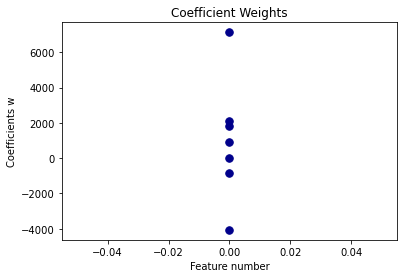

RMSE: 12297.865462079037
coefficient of determination: 0.7329468819647322
Training set score: -173096262.40
Test set score: -151262824.46


In [30]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV().fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))
print("Alpha value:")
print(reg.alpha_)

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "darkblue")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

# Step 4: Get results
from sklearn.metrics import r2_score

predictions = reg.predict(X_test)
coefficient_of_dermination = r2_score(y_test, predictions)


# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)
print('coefficient of determination:', coefficient_of_dermination)

print("Training set score: {:.2f}".format(m.score(X_train, y_train)))
print("Test set score: {:.2f}".format(m.score(X_test, y_test)))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Coefficients W
[    0.           935.38778363   193.65800004  -729.00070241
  5516.24522158     0.         -2344.05170277]
Intercept W0
5449.853839165677
Error
153233002.9229846
Alpha value:
387.8510635052742


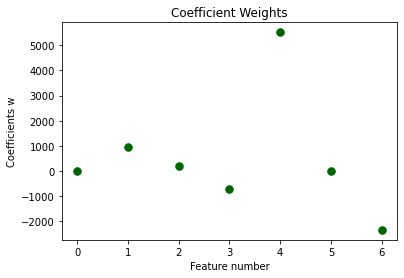

RMSE: 12378.731878628949
coefficient of determination: 0.7294232409944539
Training set score: -173096262.40
Test set score: -151262824.46


In [31]:
from sklearn.linear_model import LassoCV
reg = LassoCV().fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))
print("Alpha value:")
print(reg.alpha_)

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "darkgreen")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

# Step 4: Get results
from sklearn.metrics import r2_score

predictions = reg.predict(X_test)
coefficient_of_dermination = r2_score(y_test, predictions)


# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)
print('coefficient of determination:', coefficient_of_dermination)

print("Training set score: {:.2f}".format(m.score(X_train, y_train)))
print("Test set score: {:.2f}".format(m.score(X_test, y_test)))



In [32]:
lasso_regressor.best_params_

{'alpha': 20}

Coefficients W
[   30.60839626   899.3087063   1781.74271127  -847.74600489
  7261.38209889  1622.47575576 -4114.92190424]
Intercept W0
[2288.49704366]
Error
151262824.4582764


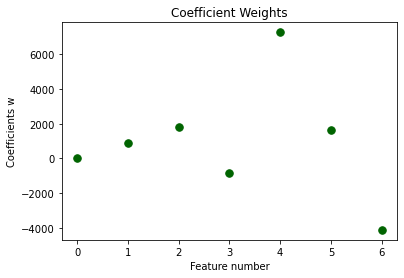

RMSE: 12298.895253569583
coefficient of determination: 0.7329021554154629
Training set score: -173096262.40
Test set score: -151262824.46


In [34]:
reg = Lasso(alpha = 20).fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "darkgreen")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

# Step 4: Get results
from sklearn.metrics import r2_score

predictions = reg.predict(X_test)
coefficient_of_dermination = r2_score(y_test, predictions)


# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)
print('coefficient of determination:', coefficient_of_dermination)

print("Training set score: {:.2f}".format(m.score(X_train, y_train)))
print("Test set score: {:.2f}".format(m.score(X_test, y_test)))



### Bayesian Ridge Regression

Coefficients W
[   29.77202171   899.48186966  1760.89281559  -838.6012948
  7039.40609528  1797.00159561 -4005.66452361]
Intercept W0
2202.981667132466
Error
151294614.2350622


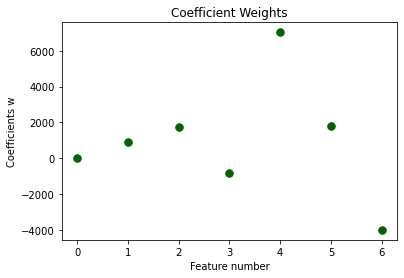

RMSE: 12300.187569100815
coefficient of determination: 0.732846021458625
Training set score: 0.69
Test set score: 0.73


In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge #Importing the linear regression models
import matplotlib.pyplot as plt 


reg = BayesianRidge().fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred, variance = reg.predict(X_test, return_std=True)
print("Error")
print(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "darkgreen")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

# Step 4: Get results
from sklearn.metrics import r2_score
import math

predictions = reg.predict(X_test)
coefficient_of_dermination = r2_score(y_test, predictions)


# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)
print('coefficient of determination:', coefficient_of_dermination)

print("Training set score: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))



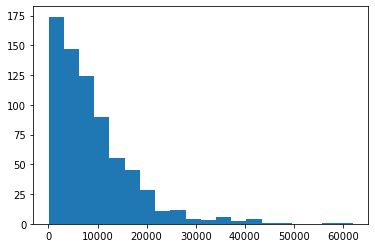

In [69]:
import matplotlib.pyplot as plt

errors = abs(y_test - predictions)
x = errors
plt.hist(x, bins = 20)
plt.show()

Error
128414005.90896146
Coefficient Mean -282.3870761145297
Coefficient Max 7402.347407673175
Coefficient Min -8531.197709651395
Total number of coefficients 36
Zero weight coefficients 1


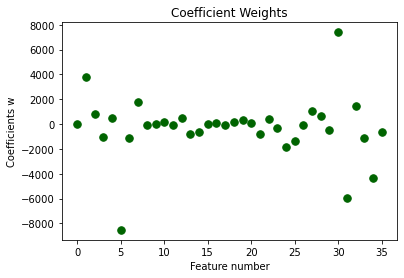

RMSE: 11331.990377200356
coefficient of determination: 0.7732482894221605
Training set score: 0.74
Test set score: 0.77


In [49]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import PolynomialFeatures #Used for basis function expansion

reg = make_pipeline(PolynomialFeatures(2), Ridge(alpha=1))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))
print("Coefficient Mean", np.mean(reg.named_steps['ridge'].coef_))
print("Coefficient Max", np.max(reg.named_steps['ridge'].coef_))
print("Coefficient Min", np.min(reg.named_steps['ridge'].coef_))
print("Total number of coefficients", len(reg.named_steps['ridge'].coef_))
print("Zero weight coefficients", len(reg.named_steps['ridge'].coef_[reg.named_steps['ridge'].coef_==0]))

plt.figure()
plt.plot(np.arange(len(reg.named_steps['ridge'].coef_)), reg.named_steps['ridge'].coef_, ".",  markersize=15, color = "darkgreen")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

# Step 4: Get results
from sklearn.metrics import r2_score
import math

predictions = reg.predict(X_test)
coefficient_of_dermination = r2_score(y_test, predictions)


# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)
print('coefficient of determination:', coefficient_of_dermination)

print("Training set score: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))


### Trying out multiple different models

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge #Importing the linear regression models
from sklearn.metrics import mean_squared_error #For evaluation of the models
from sklearn.preprocessing import PolynomialFeatures #Used for basis function expansion
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
import pandas as pd
num_instances = len(X_train)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print("")
    print(msg)
    
    # Step 4: Get results
    from sklearn.metrics import r2_score
    import math


    coefficient_of_dermination = r2_score(y_test, predictions)


    # Step 5: Predict / Measurements
    # y_pred = model.predict(x_)
    rmse = math.sqrt(mean_squared_error(y_test, predictions))

    print('RMSE:', rmse)
    print('coefficient of determination:', coefficient_of_dermination)

    print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(model.score(X_test, y_test)))



LiR: 0.733410 (9094.254872)
RMSE: 12292.500732515677
coefficient of determination: 0.7331798256855029
Training set score: 0.69
Test set score: 0.73

Ridge: 0.733383 (9093.451531)
RMSE: 12293.118757198294
coefficient of determination: 0.7331529954086577
Training set score: 0.69
Test set score: 0.73

Lasso: 0.733400 (9093.958712)
RMSE: 12292.727138465294
coefficient of determination: 0.7331699968910896
Training set score: 0.69
Test set score: 0.73

ElasticNet: 0.718390 (9321.391554)
RMSE: 12639.284439324425
coefficient of determination: 0.7179129475670221
Training set score: 0.67
Test set score: 0.72

Bag_Re: 0.771561 (8098.696338)
RMSE: 11374.08652568081
coefficient of determination: 0.7715604829618345
Training set score: 0.94
Test set score: 0.77

RandomForest: 0.771509 (8063.541171)
RMSE: 11383.652429857375
coefficient of determination: 0.7711760741667724
Training set score: 0.94
Test set score: 0.77

ExtraTreesRegressor: 0.760952 (8253.836836)
RMSE: 11639.146058827042
coefficient of

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training set score: 0.99
Test set score: 0.68

SVM: 0.000576 (18154.376663)
RMSE: 24169.50231167506
coefficient of determination: -0.03151035779924971
Training set score: -0.03
Test set score: -0.03


### ElasticNetCV

Elastic net is a combination of two modifications on the basic kind of machine learning model possible, ordinary least squares regression. In OLS, we build a model which minimizes the sum of the squared distances between the model predictions and the data actuality on a line (the residuals). This model is not very robust against colinearity, however, and colinearity tends to occur in lots of different real-world datasets. Hence the need to "fix" this bias somehow.

The two most popular ways of addressing this problem are ridge regression and lasso regression. Both of these algorithms work by adding a second term, or penalty, to the cost minimized by the algorithm In the ridge case, the penalty added is what is called an L2 norm; it is on the order of the square of the residuals. In lasso regression the penalty is an L1 norm, an absolute value on the order of the residuals themselves.

Because these two algorithms work in different ways, they have fundamentally different properties. Ridge regression basically works by smoothing out a curve, removing its biases towards outliers and towards data with the same information in multiple dimensions. Lasso regression works by both manipulating the coefficients of the variables and by removing variables from the model entirely! In other words, lasso regression implicitly performs model selection, which ridge regression does not do.

Both algorithms rely on a "strength of correction" hyperparameter,  ρ  (NB:  λ  in previous notebooks). Elastic net is a generalization of these two algorithms that actually combines them, by folding all three terms into the cost function: the OLS cost, the ridge L2 penalty, and the lasso L1 penalty.

In [53]:
from sklearn.linear_model import ElasticNetCV
clf = ElasticNetCV(l1_ratio=0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [54]:
import math

model = clf
r_sq = model.score(X_test, y_test)
rmse = math.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print('RMSE:', rmse)
print('coefficient of determination:', r_sq)
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

RMSE: 16329.351592407134
coefficient of determination: 0.529157065219565
Training set score: 0.50
Test set score: 0.53


### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

AdaBoost can be used to boost the performance of any machine learning algorithm. Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”.

In [55]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

model = regr
r_sq = model.score(X_test, y_test)
rmse = math.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print('RMSE:', rmse)
print('coefficient of determination:', r_sq)
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))


RMSE: 13622.341884484118
coefficient of determination: 0.6723261911951545
Training set score: 0.68
Test set score: 0.67


### DT Regression

In [56]:
#Decision Tree Regression: 

#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import math


# We do not split the dataset because we have a small dataset

#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor 
#DecisionTreeRegressor class has many parameters. Input only random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset. 
regressor.fit(X_train,y_train)


#4 Predicting a new result
y_pred = regressor.predict(X_test)
predictions = y_pred

coefficient_of_dermination = r2_score(y_test, predictions)


# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)
print('coefficient of determination:', coefficient_of_dermination)

print("Training set score: {:.2f}".format(regressor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regressor.score(X_test, y_test)))


RMSE: 13748.431665540178
coefficient of determination: 0.6662321534467066
Training set score: 0.99
Test set score: 0.67


### Trying out Repeated K-fold CV on the best models

How to measure the model’s bias-variance?
After repeated k-fold cross validation, we’ll get k\*repetitions different model estimation errors (e1, e2 …., ek\*repetitions). In an ideal scenario, these error values should sum up to zero. To return the model’s bias, we take the average of all the errors. Lower the average value, better the model.

Similarly for calculating the model variance, we take standard deviation of all the errors. A low value of standard deviation suggests our model does not vary a lot with different subsets of training data.

Source: https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

#### Polynomial Regression

In [17]:
from sklearn.model_selection import KFold 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
import math


x1, y1 = np.array(X), np.array(y)

rmse_list = []
r_sq_list = []
ms_list = []
ms1_list = []
xtrain = []
xtest = []
ytrain =[]
ytest = []

for train_index, test_index in kf.split(x1):
    # print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = x1[train_index], x1[test_index] 
    
    y_train, y_test = y1[train_index], y1[test_index]
    
    # from sklearn.preprocessing import StandardScaler
    import pandas as pd
    '''
    std = StandardScaler()
    afp = np.append(pd.DataFrame(X_train).values, pd.DataFrame(X_test).values)
    std.fit(afp.reshape((-1,1)))

    X_train = std.transform(X_train)
    X_test = std.transform(X_test)
    '''
    x = X_train
    y = y_train
    x, y = np.array(x), np.array(y)

    xt = X_test
    yt = y_test
    xt, yt = np.array(xt), np.array(yt)

    # Step 2b: Transform input data
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    x_t = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt)

    # Step 3: Create a model and fit it
    model = LinearRegression().fit(x_, y)

    # Step 4: Get results
    r_sq = model.score(x_t, yt)
    intercept, coefficients = model.intercept_, model.coef_

    # Step 5: Predict / Measurements
    # y_pred = model.predict(x_)
    rmse = math.sqrt(mean_squared_error(yt, model.predict(x_t)))

    print('RMSE:', rmse)
    print('coefficient of determination:', r_sq)
    ms = model.score(x_, y)
    ms1 = model.score(x_t, yt)
    print("Training set score: {:.2f}".format(ms))
    print("Test set score: {:.2f}".format(ms1))
    
    rmse_list.append(rmse) 
    r_sq_list.append(r_sq)
    ms_list.append(ms)
    ms1_list.append(ms1)
    xtrain.append(x_)
    xtest.append(x_t)
    ytrain.append(y)
    ytest.append(yt)
    

RMSE: 11844.795730159563
coefficient of determination: 0.7657427095799961
Training set score: 0.75
Test set score: 0.77
RMSE: 13008.787492834357
coefficient of determination: 0.7059291704574036
Training set score: 0.76
Test set score: 0.71
RMSE: 11544.45175971345
coefficient of determination: 0.7486004095258199
Training set score: 0.75
Test set score: 0.75
RMSE: 11286.967002943316
coefficient of determination: 0.7608372440685602
Training set score: 0.75
Test set score: 0.76
RMSE: 12066.471822149217
coefficient of determination: 0.7287598739928354
Training set score: 0.76
Test set score: 0.73
RMSE: 12892.360962636014
coefficient of determination: 0.7120480973546015
Training set score: 0.76
Test set score: 0.71
RMSE: 11966.58922135633
coefficient of determination: 0.7591318641299105
Training set score: 0.75
Test set score: 0.76
RMSE: 11333.637067729127
coefficient of determination: 0.7532432268849651
Training set score: 0.75
Test set score: 0.75
RMSE: 11865.015777935398
coefficient of de

In [18]:
import statistics

print("Variance of the errors list =", statistics.variance(rmse_list)) #High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).
print("Standard deviation of the errors list =", statistics.stdev(rmse_list)) 
print("Mean of the errors list =", statistics.mean(rmse_list)) #
index0 = rmse_list.index(min(rmse_list))
print("Minimum value of the errors list =", min(rmse_list), "at index =", index0) 


Variance of the errors list = 313179.0781930336
Standard deviation of the errors list = 559.6240507635761
Mean of the errors list = 11947.797956287714
Minimum value of the errors list = 10193.745828782565 at index = 15


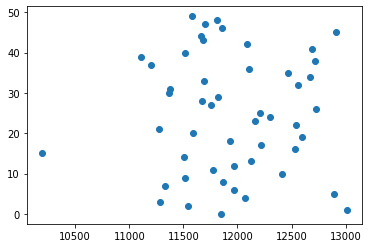

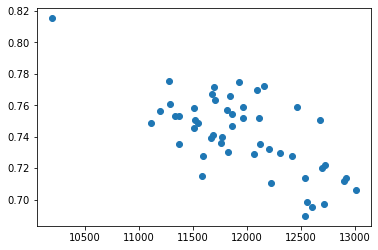

In [9]:
import matplotlib.pyplot
import pylab

idx = []
for i in range(0,len(rmse_list)):
    idx.append(i)
    
matplotlib.pyplot.scatter(rmse_list, idx)
matplotlib.pyplot.show()
matplotlib.pyplot.scatter(rmse_list, r_sq_list)
matplotlib.pyplot.show()

In [21]:
X_train = xtrain[index0]
y_train = ytrain[index0]

X_test = xtest[index0]
y_test = ytest[index0]

x = X_train
y = y_train
x, y = x, y

xt = X_test
yt = y_test
xt, yt = xt, yt

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
x_t = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_t, yt)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(yt, model.predict(x_t)))

print('RMSE:', rmse)
print('coefficient of determination:', r_sq)
ms = model.score(x_, y)
ms1 = model.score(x_t, yt)
print("Training set score: {:.2f}".format(ms))
print("Test set score: {:.2f}".format(ms1))

RMSE: 990267629.7878773
coefficient of determination: -1742299512.8173516
Training set score: 0.79
Test set score: -1742299512.82


#### XGBoost

In [52]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import r2_score

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 


x1, y1 = np.array(X), np.array(y)
rmse_list1 = []
r_sq_list1 = []
ms_list1 = []
ms1_list1 = []
xtrain1 = []
xtest1 = []
ytrain1 =[]
ytest1 = []

for train_index, test_index in kf.split(x1):
    # print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = x1[train_index], x1[test_index] 
    y_train, y_test = y1[train_index], y1[test_index]
    
    #from sklearn.preprocessing import StandardScaler
    

    '''
    std = StandardScaler()
    afp = np.append(pd.DataFrame(X_train).values, pd.DataFrame(X_test).values)
    std.fit(afp.reshape((-1,1)))
    

    X_train = std.transform(X_train)
    X_test = std.transform(X_test)
    '''
    

    model=xgb.XGBRegressor(random_state=1, n_estimators=5000, learning_rate=0.01)
    model.fit(X_train, y_train)
     

    coefficient_of_dermination = r2_score(y_test, model.predict(X_test))
    r_sq = coefficient_of_dermination
    
    # Step 5: Predict / Measurements
    # y_pred = model.predict(x_)
    rmse = math.sqrt(mean_squared_error(y_test, model.predict(X_test)))

    print('RMSE:', rmse)
    print('coefficient of determination:', r_sq)
    ms = model.score(X_train, y_train)
    ms1 = model.score(X_test, y_test)
    print(math.sqrt(mean_squared_error(y_test, model.predict(X_test))))

    print("Training set score: {:.2f}".format(ms))
    print("Test set score: {:.2f}".format(ms1))
    
    rmse_list1.append(rmse) 
    r_sq_list1.append(r_sq)
    ms_list1.append(ms)
    ms1_list1.append(ms1)
    xtrain1.append(X_train)
    xtest1.append(X_test)
    ytrain1.append(y_train)
    ytest1.append(y_test)
    

C:\Users\User\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


RMSE: 11614.795915254253
coefficient of determination: 0.7747519027597395
11614.795915254253
Training set score: 0.96
Test set score: 0.77
RMSE: 11482.309776626358
coefficient of determination: 0.7708938080510658
11482.309776626358
Training set score: 0.96
Test set score: 0.77
RMSE: 12222.691396558372
coefficient of determination: 0.7181930934848669
12222.691396558372
Training set score: 0.96
Test set score: 0.72
RMSE: 11346.530112655473
coefficient of determination: 0.7583063844039915
11346.530112655473
Training set score: 0.96
Test set score: 0.76
RMSE: 10838.916983128891
coefficient of determination: 0.7811406468574198
10838.916983128891
Training set score: 0.95
Test set score: 0.78
RMSE: 12085.53003709497
coefficient of determination: 0.746961593639621
12085.53003709497
Training set score: 0.95
Test set score: 0.75
RMSE: 12181.334398694511
coefficient of determination: 0.7504093476621084
12181.334398694511
Training set score: 0.96
Test set score: 0.75
RMSE: 10605.070788411129
coeff

In [53]:
import statistics
# print(rmse_list1) 
print("Variance of the errors list =", statistics.variance(rmse_list1)) #High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).
print("Standard deviation of the errors list =", statistics.stdev(rmse_list1)) 
print("Mean of the errors list =", statistics.mean(rmse_list1)) #
index1 = rmse_list1.index(min(rmse_list1))

print("Minimum value of the errors list =", min(rmse_list1), "at index =", index1) #

Variance of the errors list = 439026.42609935044
Standard deviation of the errors list = 662.5906927352288
Mean of the errors list = 11516.863475646713
Minimum value of the errors list = 10073.101944152473 at index = 39


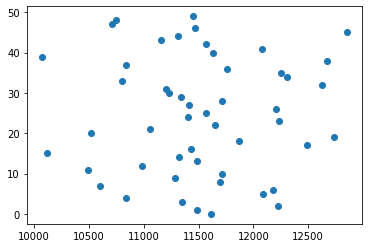

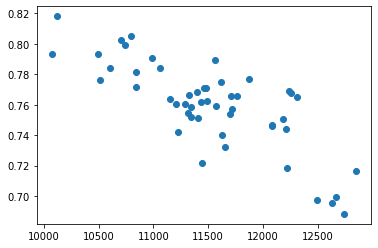

In [54]:
import matplotlib.pyplot
import pylab

idx = []
for i in range(0,len(rmse_list1)):
    idx.append(i)
    
matplotlib.pyplot.scatter(rmse_list1, idx)
matplotlib.pyplot.show()
matplotlib.pyplot.scatter(rmse_list1, r_sq_list1)
matplotlib.pyplot.show()

In [57]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV

X_train = xtrain1[index1]
y_train = ytrain1[index1]

X_test = xtest1[index1]
y_test = ytest1[index1]

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:    3.7s finished


[19:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
0.7506403045260689
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [58]:
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error

X_train = xtrain1[index1]
y_train = ytrain1[index1]

X_test = xtest1[index1]
y_test = ytest1[index1]

model=xgb.XGBRegressor(parameters = xgb_grid.best_params_)
model.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, model.predict(X_test))
print(" R-squared: " ,coefficient_of_dermination)

[19:30:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { parameters } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


10209.184595271761
Training set score: 0.95
Test set score: 0.79
 R-squared:  0.7875477449272279


In [59]:
#Step 5: Predict / Measurements
import numpy as np
naselba = 2
kvadratura = 100
sobi = 3
sprat = 10 
lift =  1
greenje = 1 
parking = 1
y_pred = model.predict(np.array([[naselba, kvadratura, sobi, sprat, lift, greenje, parking], ]))
print("Предвидената цена за стан со дадените карактеристики изнесува: ", y_pred[0])

Предвидената цена за стан со дадените карактеристики изнесува:  87112.695


#### Random Forest Regressor

In [29]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import sys

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 


x2, y2 = np.array(X), np.array(y)
rmse_list2 = []
r_sq_list2 = []
ms_list2 = []
ms1_list2 = []
xtrain2 = []
xtest2 = []
ytrain2 = []
ytest2 = []

for train_index, test_index in kf.split(x2):
    # print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = x2[train_index], x2[test_index] 
    y_train, y_test = y2[train_index], y2[test_index]
    
    from sklearn.preprocessing import StandardScaler
    import pandas as pd

    '''
    std = StandardScaler()
    afp = np.append(pd.DataFrame(X_train).values, pd.DataFrame(X_test).values)
    std.fit(afp.reshape((-1,1)))

    X_train = std.transform(X_train)
    X_test = std.transform(X_test)
    '''
    
    
    lr = RandomForestRegressor(n_estimators=50)
    #lr = RidgeCV(alphas=np.arange(70,100,0.1), fit_intercept=True)
    lr.fit(X_train, y_train)
    y_train = np.array(y_train).reshape((y_train.shape[0],))
    y_test= np.array(y_test).reshape((y_test.shape[0],))

    # Step 4: Get results
    from sklearn.metrics import r2_score

    predictions = lr.predict(X_test)
    r_sq = r2_score(y_test, predictions)


    # Step 5: Predict / Measurements
    # y_pred = model.predict(x_)
    rmse = math.sqrt(mean_squared_error(y_test, predictions))

    print('RMSE:', rmse)
    print('coefficient of determination:', r_sq)
    ms = lr.score(X_train, y_train)
    ms1 = lr.score(X_test, y_test)
    
    
    print("Training set score: {:.2f}".format(ms))
    print("Test set score: {:.2f}".format(ms1))
    
    # print(math.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    
      
    rmse_list2.append(rmse) 
    r_sq_list2.append(r_sq)
    ms_list2.append(ms)
    ms1_list2.append(ms1)
    xtrain2.append(X_train)
    xtest2.append(X_test)
    ytrain2.append(y_train)
    ytest2.append(y_test)
    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 11937.902000230843
coefficient of determination: 0.7731526804326283
Training set score: 0.96
Test set score: 0.77
RMSE: 11405.29855336971
coefficient of determination: 0.7432993955667451


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.74
RMSE: 10795.629359436552
coefficient of determination: 0.7904324004723231
Training set score: 0.96
Test set score: 0.79
RMSE: 10969.798689405317
coefficient of determination: 0.7782562729913012
Training set score: 0.96
Test set score: 0.78


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 12208.913199361696
coefficient of determination: 0.727184466750437
Training set score: 0.96
Test set score: 0.73
RMSE: 11305.346014361108
coefficient of determination: 0.7986979057350463


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.80
RMSE: 11744.51582775069
coefficient of determination: 0.7285162312608178


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.73
RMSE:

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 11028.094765773702
coefficient of determination: 0.7865466912234398
Training set score: 0.96
Test set score: 0.79


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 11677.670629509754
coefficient of determination: 0.7680070750040944
Training set score: 0.96
Test set score: 0.77


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 10895.459285156567
coefficient of determination: 0.7484667716796456
Training set score: 0.96
Test set score: 0.75


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 11858.458809170983
coefficient of determination: 0.751604166500027
Training set score: 0.96
Test set score: 0.75
RMSE: 10571.729649009365
coefficient of determination: 0.7801027853321147


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.78
RMSE: 12947.56692115903
coefficient of determination: 0.70568665371101


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.71
RMSE: 11726.434760608247
coefficient of determination: 0.7454360162130602


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.75
RMSE: 11346.682563813562
coefficient of determination: 0.7841780761696417


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.78
RMSE:

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 10847.887291425775
coefficient of determination: 0.799656127707169
Training set score: 0.96
Test set score: 0.80


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 11330.134442056393
coefficient of determination: 0.7688114877862788
Training set score: 0.96
Test set score: 0.77


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 12194.319518450453
coefficient of determination: 0.7221045005039337
Training set score: 0.96
Test set score: 0.72
RMSE: 10994.513792605689
coefficient of determination: 0.7805035629674089


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.78
RMSE: 11758.007366173128
coefficient of determination: 0.7499301492610098
Training set score: 0.96
Test set score: 0.75
RMSE: 11869.026384223536
coefficient of determination: 0.771831194877588
Training set score: 0.96
Test set score: 0.77


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 10812.688543680955
coefficient of determination: 0.8039425150905891
Training set score: 0.96
Test set score: 0.80
RMSE: 11562.963190471784
coefficient of determination: 0.747881119948004


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.75
RMSE: 12219.643093730981
coefficient of determination: 0.7352963373202968
Training set score: 0.96
Test set score: 0.74
RMSE: 10462.638655711951
coefficient of determination: 0.7652941194498815
Training set score: 0.96
Test set score: 0.77


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 11326.207565588593
coefficient of determination: 0.7497431815765478
Training set score: 0.96
Test set score: 0.75


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 12239.6374914136
coefficient of determination: 0.7401860901782424
Training set score: 0.96
Test set score: 0.74
RMSE: 11035.364779954141
coefficient of determination: 0.7895196042313994
Training set score: 0.96
Test set score: 0.79
RMSE: 11709.915614323301
coefficient of determination: 0.760002158342475
Training set score: 0.96
Test set score: 0.76


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 11287.69653992836
coefficient of determination: 0.763284761771335
Training set score: 0.96
Test set score: 0.76
RMSE: 12407.738064816192
coefficient of determination: 0.7392704441612459
Training set score: 0.96
Test set score: 0.74


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 11006.435878026361
coefficient of determination: 0.7852419627092532
Training set score: 0.96
Test set score: 0.79
RMSE: 12138.872492420429
coefficient of determination: 0.7532845370120753


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.75
RMSE: 10531.120611169055
coefficient of determination: 0.7530776101274268
Training set score: 0.96
Test set score: 0.75


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 11223.480114463058
coefficient of determination: 0.7822639471965546
Training set score: 0.96
Test set score: 0.78
RMSE: 11992.569234016457
coefficient of determination: 0.7547858489162209
Training set score: 0.96
Test set score: 0.75
RMSE: 11512.89493942929
coefficient of determination: 0.7401852213065114
Training set score: 0.96
Test set score: 0.74


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 10410.008237347945
coefficient of determination: 0.7704461694028486
Training set score: 0.96
Test set score: 0.77
RMSE: 12229.537986734817
coefficient of determination: 0.7841877395861317


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.78
RMSE: 11434.121644020812
coefficient of determination: 0.7465881140806885
Training set score: 0.96
Test set score: 0.75


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 12780.698629672828
coefficient of determination: 0.7475546414711103
Training set score: 0.96
Test set score: 0.75
RMSE: 10019.307261274438
coefficient of determination: 0.7946180593828498


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.79
RMSE: 10799.549704440782
coefficient of determination: 0.7721575416007351


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.77
RMSE: 10886.73394072807
coefficient of determination: 0.8081260583339724


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.81
RMSE: 11926.869587303087
coefficient of determination: 0.7227473399656559
Training set score: 0.96
Test set score: 0.72
RMSE: 10388.101901640679
coefficient of determination: 0.7696074900163599
Training set score: 0.96

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Test set score: 0.77
RMSE: 11920.98707421029
coefficient of determination: 0.7822441881719888


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.78


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE: 11850.947951626204
coefficient of determination: 0.7498979854972159
Training set score: 0.96
Test set score: 0.75
RMSE: 10418.758291097158
coefficient of determination: 0.8189888036895617


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.82
RMSE: 11631.047166448503
coefficient of determination: 0.7256694252702234


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training set score: 0.96
Test set score: 0.73


In [31]:
import statistics
# print(rmse_list1) 
print("Variance of the errors list =", statistics.variance(rmse_list2)) #High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).
print("Standard deviation of the errors list =", statistics.stdev(rmse_list2)) 
print("Mean of the errors list =", statistics.mean(rmse_list2)) #
index2 = rmse_list2.index(min(rmse_list2))

print("Minimum value of the errors list =", min(rmse_list2), "at index =", index2) #

Variance of the errors list = 439478.6510486557
Standard deviation of the errors list = 662.9318600343897
Mean of the errors list = 11431.598520174844
Minimum value of the errors list = 10019.307261274438 at index = 41


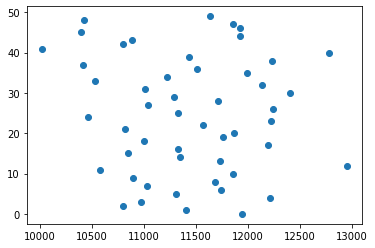

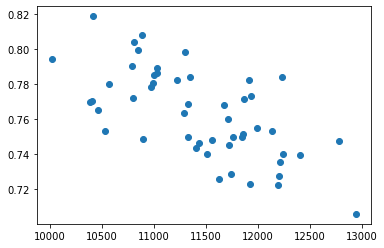

In [32]:
import matplotlib.pyplot
import pylab

idx = []
for i in range(0,len(rmse_list2)):
    idx.append(i)
    
matplotlib.pyplot.scatter(rmse_list2, idx)
matplotlib.pyplot.show()
matplotlib.pyplot.scatter(rmse_list2, r_sq_list2)
matplotlib.pyplot.show()

In [33]:
X_train, X_test = xtrain2[index2], xtest2[index2] 
y_train, y_test = ytrain2[index2], ytest2[index2]
    
from sklearn.preprocessing import StandardScaler
import pandas as pd

lr = RandomForestRegressor(n_estimators=50)
#lr = RidgeCV(alphas=np.arange(70,100,0.1), fit_intercept=True)
lr.fit(X_train, y_train)
y_train = np.array(y_train).reshape((y_train.shape[0],))
y_test= np.array(y_test).reshape((y_test.shape[0],))

# Step 4: Get results
from sklearn.metrics import r2_score

predictions = lr.predict(X_test)
r_sq = r2_score(y_test, predictions)


# Step 5: Predict / Measurements
# y_pred = model.predict(x_)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)
print('coefficient of determination:', r_sq)
ms = lr.score(X_train, y_train)
ms1 = lr.score(X_test, y_test)
    
    
print("Training set score: {:.2f}".format(ms))
print("Test set score: {:.2f}".format(ms1))

RMSE: 9890.834965240918
coefficient of determination: 0.7998513000879444
Training set score: 0.96
Test set score: 0.80


In [72]:
#Step 5: Predict / Measurements
import numpy as np
naselba = 2
kvadratura = 100
sobi = 3
sprat = 10 
lift =  1
greenje = 1 
parking = 1
y_pred = lr.predict(np.array([[naselba, kvadratura, sobi, sprat, lift, greenje, parking], ]))
print("Предвидената цена за стан со дадените карактеристики изнесува: ", y_pred[0], "ЕУР")

Предвидената цена за стан со дадените карактеристики изнесува:  89912.44666666666 ЕУР


### XGBoost hyper-parameters tuning

In [101]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

params['eval_metric'] = "mae"

num_boost_round = 999

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
#xgb.DMatrix(X, label=y)

[19:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:49496.55859
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:34997.38672
[2]	Test-mae:25009.16797
[3]	Test-mae:18106.44336
[4]	Test-mae:13616.98144
[5]	Test-mae:11005.01465
[6]	Test-mae:9443.46094
[7]	Test-mae:8611.67285
[8]	Test-mae:8161.33008
[9]	Test-mae:7905.48584
[10]	Test-mae:7736.97022
[11]	Test-mae:7719.16016
[12]	Test-mae:7718.44482
[13]	Test-mae:7702.48779
[14]	Test-mae:7746.48584
[15]	Test-mae:7721.07617
[16]	Test-mae:7710.17773
[17]	Test-mae:7718.41113
[18]	Test-mae:7707.14600
[19]	Test-mae:7706.56982
[20]	Test-mae:7716.77148
[21]	Test-mae:7717.48242
[22]	Test-mae:7719.48389
[23]	Test-mae:7719.75049
Stopping. Best iteration:
[13]	Test-mae:7702.48779

[19:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: r

In [102]:
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 7702.49 with 14 rounds


In [103]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[19:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,49511.024219,216.056370,49538.853125,1097.874332
1,35037.684375,140.143143,35060.496875,984.404582
2,24946.812109,80.868617,25080.824219,780.090566
3,17900.432813,45.558115,18153.949610,629.915994
4,13130.061914,33.879457,13685.588477,363.976595
5,10115.061719,45.656175,11089.159180,260.674536
6,8296.696289,48.046750,9566.499023,281.006270
7,7246.140234,41.325359,8734.250977,272.257065
8,6650.381640,38.250399,8287.450684,328.830451
9,6259.650781,47.075313,8079.627441,339.220422


cv returns a table where the rows correspond to the number of boosting trees used, here again, we stopped before the 999 rounds (fortunately!).
The 4 columns correspond to the mean and standard deviation of MAE on the test dataset and on the train dataset. For this tutorial we will only try to improve the mean test MAE. We can get the best MAE score from cv with:

In [104]:
cv_results['test-mae-mean'].min()

7830.668262000001

Now that we know how to use cv, we are ready to start tuning! We will first tune our parameters to minimize the MAE on cross-validation, and then check the performance of our model on the test dataset.

In [105]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [106]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[19:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 7961.856836000001 for 12 rounds
CV with max_depth=9, min_child_weight=

We get the best score with a max_depth of 10 and min_child_weight of 7, so let's update our params

In [107]:
params['max_depth'] = 10
params['min_child_weight'] = 7

In [108]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [109]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[19:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 7903.475 for 13 rounds
CV with subsample=1.0, colsample=0.9
[19:28:27] WA

	MAE 7981.643945399999 for 15 rounds
CV with subsample=0.8, colsample=0.8
[19:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 7924.046777400001 for 14 rounds
CV w

In [110]:
params['subsample'] = 1.0
params['colsample_bytree'] = 0.7

In [111]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

Wall time: 0 ns
CV with eta=0.3
[19:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 103 ms
	MAE 7873.0469728 for 13 rounds

CV with eta=0.2
[19:28:40] WARNI

In [112]:
params['eta'] = .01

In [113]:
params

{'max_depth': 10,
 'min_child_weight': 7,
 'eta': 0.01,
 'subsample': 1.0,
 'colsample_bytree': 0.7,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [114]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[19:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:69568.67969
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:68874.15625
[2]	Test-mae:68194.88281
[3]	Test-mae:67520.85938
[4]	Test-mae:66853.86719
[5]	Test-mae:66183.66406
[6]	Test-mae:65530.97266
[7]	Test-mae:64884.44531
[8]	Test-mae:64244.81641
[9]	Test-mae:63601.72266
[10]	Test-mae:62963.97266
[11]	Test-mae:62342.99609
[12]	Test-mae:61725.86719
[13]	Test-mae:61117.95703
[14]	Test-mae:60503.05078
[15]	Test-mae:59910.08594
[16]	Test-mae:59309.56250
[17]	Test-mae:58724.54297
[18]	Test-mae:58135.78125
[19]	Test-mae:57553.47266
[20]	Test-mae:56988.46094
[21]	Test-mae:56429.56250
[22]	Test-mae:55865.72266
[23]	Test-mae:55307.47656
[24]	Test-mae:54756.03906
[25]	Test-mae:54218.61328
[26]	Test-mae:53686.29688
[27]	Test-mae:53159.36719
[28]	Test-mae:52628.00391
[29]	Test-mae:52112.859

[302]	Test-mae:8163.19238
[303]	Test-mae:8153.58740
[304]	Test-mae:8144.07422
[305]	Test-mae:8134.32031
[306]	Test-mae:8124.23682
[307]	Test-mae:8114.99707
[308]	Test-mae:8104.97022
[309]	Test-mae:8095.13672
[310]	Test-mae:8085.16504
[311]	Test-mae:8076.31885
[312]	Test-mae:8066.93506
[313]	Test-mae:8058.90820
[314]	Test-mae:8046.29883
[315]	Test-mae:8037.69043
[316]	Test-mae:8031.00439
[317]	Test-mae:8020.81397
[318]	Test-mae:8012.29199
[319]	Test-mae:8004.23535
[320]	Test-mae:7998.20752
[321]	Test-mae:7990.13477
[322]	Test-mae:7983.06689
[323]	Test-mae:7975.13818
[324]	Test-mae:7967.91895
[325]	Test-mae:7961.63623
[326]	Test-mae:7954.52881
[327]	Test-mae:7948.75391
[328]	Test-mae:7942.65918
[329]	Test-mae:7936.28223
[330]	Test-mae:7929.84961
[331]	Test-mae:7924.98145
[332]	Test-mae:7918.69629
[333]	Test-mae:7913.09570
[334]	Test-mae:7906.49561
[335]	Test-mae:7900.77734
[336]	Test-mae:7894.17432
[337]	Test-mae:7886.75830
[338]	Test-mae:7881.37598
[339]	Test-mae:7875.78369
[340]	Test-m

In [115]:
#model=xgb.XGBRegressor(random_state=1, n_estimators=5000, learning_rate=0.01)
#model.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, model.predict(dtest))))
#print("Training set score: {:.2f}".format(model.score(dtrain, dtrain)))
#print("Test set score: {:.2f}".format(model.score(dtest, dtest)))

from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, model.predict(dtest))
coefficient_of_dermination

10609.698685818172


0.8012330021678369

In [122]:
from sklearn.metrics import accuracy_score

# make predictions for test data
y_pred = model.predict(dtest)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(predictions)
print(y_test)

Accuracy: 0.00%
[95503.0, 66676.0, 70838.0, 55486.0, 52014.0, 52919.0, 80544.0, 76299.0, 89671.0, 74061.0, 94797.0, 61492.0, 58148.0, 88385.0, 56335.0, 56809.0, 75913.0, 48761.0, 69746.0, 59658.0, 53663.0, 67960.0, 56397.0, 59959.0, 54086.0, 81331.0, 71228.0, 61947.0, 64105.0, 81010.0, 47421.0, 117550.0, 54577.0, 65747.0, 92060.0, 54286.0, 120443.0, 57300.0, 58485.0, 58691.0, 51367.0, 88076.0, 37363.0, 54403.0, 51248.0, 55880.0, 36853.0, 125429.0, 37225.0, 43714.0, 56504.0, 88922.0, 73474.0, 85824.0, 48755.0, 49142.0, 59329.0, 102492.0, 104069.0, 86009.0, 59812.0, 69120.0, 39546.0, 70504.0, 77489.0, 55126.0, 69770.0, 70321.0, 38192.0, 67869.0, 62809.0, 67664.0, 75863.0, 74967.0, 98431.0, 44146.0, 95816.0, 108691.0, 42344.0, 87304.0, 40347.0, 62454.0, 57937.0, 70380.0, 98395.0, 49611.0, 92446.0, 81737.0, 45493.0, 101351.0, 44754.0, 94700.0, 55609.0, 68027.0, 79976.0, 71555.0, 78735.0, 59665.0, 84600.0, 100784.0, 38130.0, 74608.0, 55151.0, 76371.0, 72675.0, 73666.0, 68889.0, 69939.0, 773